## Linear Regression
in google playstore data

In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [302]:
df = pd.read_csv("googleplaystore.csv")

In [303]:
df = df[df['Size'] != 'Varies with device']
def size_to_mb(x):
    if 'M' in x:
        return float(x.replace('M',''))
    elif 'k' in x:
        return float(x.replace('k','')) / 1024

df['Size'] = df['Size'].apply(lambda x: size_to_mb(str(x)))
(df['Size'].head(10))

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
5     5.6
6    19.0
7    29.0
8    33.0
9     3.1
Name: Size, dtype: float64

In [304]:
df = df.dropna(subset=["Category"])
df_encoded = pd.get_dummies(df, columns=["Category"], prefix="C", drop_first=True)
df_encoded

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,...,C_PERSONALIZATION,C_PHOTOGRAPHY,C_PRODUCTIVITY,C_SHOPPING,C_SOCIAL,C_SPORTS,C_TOOLS,C_TRAVEL_AND_LOCAL,C_VIDEO_PLAYERS,C_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,...,False,False,False,False,False,False,False,False,False,False
1,Coloring book moana,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,...,False,False,False,False,False,False,False,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,...,False,False,False,False,False,False,False,False,False,False
3,Sketch - Draw & Paint,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,...,False,False,False,False,False,False,False,False,False,False
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,NaN,0,9.6,10+,Free,0,Everyone,Business,29-Sep-16,...,False,False,False,False,False,False,False,False,False,False
10836,Sya9a Maroc - FR,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,25-Jul-17,...,False,False,False,False,False,False,False,False,False,False
10837,Fr. Mike Schmitz Audio Teachings,5.0,4,3.6,100+,Free,0,Everyone,Education,6-Jul-18,...,False,False,False,False,False,False,False,False,False,False
10838,Parkinson Exercices FR,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,20-Jan-17,...,False,False,False,False,False,False,False,False,False,False


In [305]:
df_encoded =  df_encoded.drop(['App','Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'], axis=1, errors='ignore')
df_encoded
#حدف ستون های اضافی

,Rating,Reviews,Size,Installs,Type,C_ART_AND_DESIGN,C_AUTO_AND_VEHICLES,C_BEAUTY,C_BOOKS_AND_REFERENCE,C_BUSINESS,...,C_PERSONALIZATION,C_PHOTOGRAPHY,C_PRODUCTIVITY,C_SHOPPING,C_SOCIAL,C_SPORTS,C_TOOLS,C_TRAVEL_AND_LOCAL,C_VIDEO_PLAYERS,C_WEATHER
0,4.1,159,19.0,"10,000+",Free,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.9,967,14.0,"500,000+",Free,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4.7,87510,8.7,"5,000,000+",Free,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4.5,215644,25.0,"50,000,000+",Free,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4.3,967,2.8,"100,000+",Free,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,NaN,0,9.6,10+,Free,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
10836,4.5,38,53.0,"5,000+",Free,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10837,5.0,4,3.6,100+,Free,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10838,NaN,3,9.5,"1,000+",Free,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [306]:
df_encoded = df_encoded.dropna(subset=['Rating'])
df_encoded
#حدف nan ها در ستون rating

,Rating,Reviews,Size,Installs,Type,C_ART_AND_DESIGN,C_AUTO_AND_VEHICLES,C_BEAUTY,C_BOOKS_AND_REFERENCE,C_BUSINESS,...,C_PERSONALIZATION,C_PHOTOGRAPHY,C_PRODUCTIVITY,C_SHOPPING,C_SOCIAL,C_SPORTS,C_TOOLS,C_TRAVEL_AND_LOCAL,C_VIDEO_PLAYERS,C_WEATHER
0,4.1,159,19.000000,"10,000+",Free,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.9,967,14.000000,"500,000+",Free,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4.7,87510,8.700000,"5,000,000+",Free,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4.5,215644,25.000000,"50,000,000+",Free,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4.3,967,2.800000,"100,000+",Free,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,4.8,44,0.604492,"1,000+",Free,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
10834,4.0,7,2.600000,500+,Free,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10836,4.5,38,53.000000,"5,000+",Free,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10837,5.0,4,3.600000,100+,Free,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [307]:
free_df = df_encoded[df_encoded['Type'] != 'Pain']
free_df

,Rating,Reviews,Size,Installs,Type,C_ART_AND_DESIGN,C_AUTO_AND_VEHICLES,C_BEAUTY,C_BOOKS_AND_REFERENCE,C_BUSINESS,...,C_PERSONALIZATION,C_PHOTOGRAPHY,C_PRODUCTIVITY,C_SHOPPING,C_SOCIAL,C_SPORTS,C_TOOLS,C_TRAVEL_AND_LOCAL,C_VIDEO_PLAYERS,C_WEATHER
0,4.1,159,19.000000,"10,000+",Free,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.9,967,14.000000,"500,000+",Free,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4.7,87510,8.700000,"5,000,000+",Free,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4.5,215644,25.000000,"50,000,000+",Free,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4.3,967,2.800000,"100,000+",Free,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,4.8,44,0.604492,"1,000+",Free,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
10834,4.0,7,2.600000,500+,Free,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10836,4.5,38,53.000000,"5,000+",Free,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10837,5.0,4,3.600000,100+,Free,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [308]:
free_df =  df_encoded.drop(['Type'], axis=1, errors='ignore')
free_df
#df_encoded.columns

,Rating,Reviews,Size,Installs,C_ART_AND_DESIGN,C_AUTO_AND_VEHICLES,C_BEAUTY,C_BOOKS_AND_REFERENCE,C_BUSINESS,C_COMICS,...,C_PERSONALIZATION,C_PHOTOGRAPHY,C_PRODUCTIVITY,C_SHOPPING,C_SOCIAL,C_SPORTS,C_TOOLS,C_TRAVEL_AND_LOCAL,C_VIDEO_PLAYERS,C_WEATHER
0,4.1,159,19.000000,"10,000+",True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.9,967,14.000000,"500,000+",True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4.7,87510,8.700000,"5,000,000+",True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4.5,215644,25.000000,"50,000,000+",True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4.3,967,2.800000,"100,000+",True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,4.8,44,0.604492,"1,000+",False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
10834,4.0,7,2.600000,500+,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10836,4.5,38,53.000000,"5,000+",False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10837,5.0,4,3.600000,100+,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [309]:
def clean_size(x):
    if isinstance(x, str):
        x = x.strip()
        if x.lower() == "varies with device" or x == "":
            return np.nan
        elif x.endswith("M"):
            return float(x[:-1])
        elif x.endswith("k"):
            return float(x[:-1]) / 1024  # تبدیل kB به MB
        else:
            try:
                return float(x)
            except:
                return np.nan
    return x

free_df["Size"] = free_df["Size"].apply(clean_size)

In [310]:
free_df["Reviews"] = pd.to_numeric(free_df["Reviews"], errors="coerce")
free_df["Installs"] = (
    free_df["Installs"].astype(str)
    .str.replace("+", "", regex=False)
    .str.replace(",", "", regex=False)
)
free_df["Installs"] = pd.to_numeric(free_df["Installs"], errors="coerce")
free_df

,Rating,Reviews,Size,Installs,C_ART_AND_DESIGN,C_AUTO_AND_VEHICLES,C_BEAUTY,C_BOOKS_AND_REFERENCE,C_BUSINESS,C_COMICS,...,C_PERSONALIZATION,C_PHOTOGRAPHY,C_PRODUCTIVITY,C_SHOPPING,C_SOCIAL,C_SPORTS,C_TOOLS,C_TRAVEL_AND_LOCAL,C_VIDEO_PLAYERS,C_WEATHER
0,4.1,159.0,19.000000,10000.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.9,967.0,14.000000,500000.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4.7,87510.0,8.700000,5000000.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4.5,215644.0,25.000000,50000000.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4.3,967.0,2.800000,100000.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,4.8,44.0,0.604492,1000.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
10834,4.0,7.0,2.600000,500.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10836,4.5,38.0,53.000000,5000.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10837,5.0,4.0,3.600000,100.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [311]:
# Removing NaN values before normalization
free_df = free_df.dropna(subset=['Reviews', 'Installs', 'Size', 'Rating'])
free_df

,Rating,Reviews,Size,Installs,C_ART_AND_DESIGN,C_AUTO_AND_VEHICLES,C_BEAUTY,C_BOOKS_AND_REFERENCE,C_BUSINESS,C_COMICS,...,C_PERSONALIZATION,C_PHOTOGRAPHY,C_PRODUCTIVITY,C_SHOPPING,C_SOCIAL,C_SPORTS,C_TOOLS,C_TRAVEL_AND_LOCAL,C_VIDEO_PLAYERS,C_WEATHER
0,4.1,159.0,19.000000,10000.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.9,967.0,14.000000,500000.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4.7,87510.0,8.700000,5000000.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4.5,215644.0,25.000000,50000000.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4.3,967.0,2.800000,100000.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,4.8,44.0,0.604492,1000.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
10834,4.0,7.0,2.600000,500.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10836,4.5,38.0,53.000000,5000.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10837,5.0,4.0,3.600000,100.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [314]:
scaler = MinMaxScaler()
cols_to_scale = ['Reviews', 'Installs', 'Size', 'Rating']
free_df[cols_to_scale] = scaler.fit_transform(free_df[cols_to_scale])

free_df[cols_to_scale].describe()

C:\Users\ofogh\AppData\Local\Temp\ipykernel_15088\3789171640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  free_df[cols_to_scale] = scaler.fit_transform(free_df[cols_to_scale])


,Reviews,Installs,Size,Rating
count,7729.000000,7729.000000,7729.000000,7729.000000
mean,0.006564,0.008418,0.229509,0.793463
std,0.041503,0.050138,0.234478,0.136141
min,0.000000,0.000000,0.000000,0.000000
25%,0.000002,0.000010,0.052921,0.750000
50%,0.000052,0.000100,0.139929,0.825000
75%,0.000868,0.001000,0.329944,0.875000
max,1.000000,1.000000,1.000000,1.000000


In [315]:
features = [
    'Reviews', 'Size', 'Installs',
    'C_ART_AND_DESIGN', 'C_AUTO_AND_VEHICLES', 'C_BEAUTY',  
    'C_BOOKS_AND_REFERENCE', 'C_BUSINESS', 'C_COMICS', 'C_COMMUNICATION',  
    'C_DATING', 'C_EDUCATION', 'C_ENTERTAINMENT', 'C_EVENTS', 'C_FAMILY',  
    'C_FINANCE', 'C_FOOD_AND_DRINK', 'C_GAME', 'C_HEALTH_AND_FITNESS',  
    'C_HOUSE_AND_HOME', 'C_LIBRARIES_AND_DEMO', 'C_LIFESTYLE',  
    'C_MAPS_AND_NAVIGATION', 'C_MEDICAL', 'C_NEWS_AND_MAGAZINES',  
    'C_PARENTING', 'C_PERSONALIZATION', 'C_PHOTOGRAPHY', 'C_PRODUCTIVITY',  
    'C_SHOPPING', 'C_SOCIAL', 'C_SPORTS', 'C_TOOLS', 'C_TRAVEL_AND_LOCAL',  
    'C_VIDEO_PLAYERS', 'C_WEATHER'
]

target = "Rating"

In [316]:
data = free_df[features + ["Rating"]].dropna()
X = data[features]
y = data["Rating"]

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [318]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [319]:
y_pred = model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R²: 0.02208196627074499
RMSE: 0.13579748665630498


## Random Forest Regression
in google playstore data

In [326]:
# build model
rf_model = RandomForestRegressor(
    n_estimators=200,   # number of tree
    max_depth=None,     # Free depth until all leaves are cleared
    random_state=42,
    n_jobs=-1           # Use all CPU cores
)

In [327]:
rf_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [328]:
y_pred = rf_model.predict(X_test)

In [329]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R²: 0.1003
RMSE: 0.1303


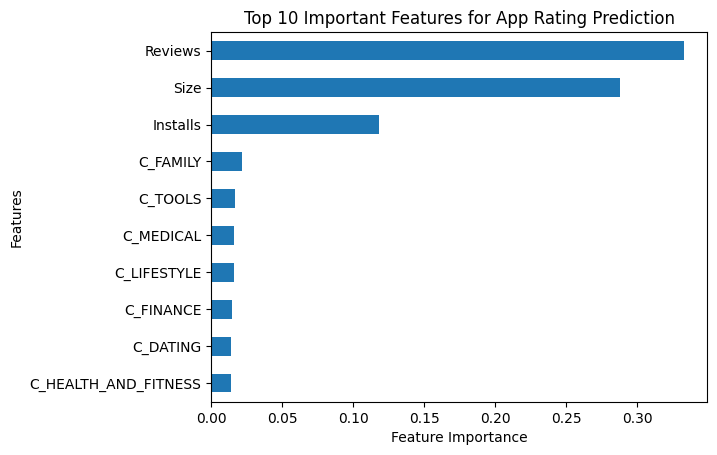

In [330]:
# Extracting and sorting the importance of features
importances = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)

importances.head(10).plot(kind="barh")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 10 Important Features for App Rating Prediction")
plt.gca().invert_yaxis()
plt.show()

In [325]:
free_df.to_csv('free_df.csv', index=False)